In [35]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from library.sb_utils import save_file

In [3]:
ski_data = pd.read_csv("../data/ski_data_cleaned.csv")

In [4]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [5]:

ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


In [6]:

state_summary = pd.read_csv("../data/state_summary.csv")

In [7]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [8]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


In [9]:

state_summary_newind = state_summary.set_index('state')

In [10]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

In [25]:
ss_columns = state_summary_newind.columns.to_list()
for column in ss_columns:
    print(column.upper())
    print(state_summary_newind[column].sort_values(ascending=False).head())
    print("")

RESORTS_PER_STATE
state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

STATE_TOTAL_SKIABLE_AREA_AC
state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

STATE_TOTAL_DAYS_OPEN
state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

STATE_TOTAL_TERRAIN_PARKS
state
California    81.0
Colorado      74.0
New York      72.0
Michigan      63.0
Vermont       50.0
Name: state_total_terrain_parks, dtype: float64

STATE_TOTAL_NIGHTSKIING_AC
state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

STATE_POPULATION
state
California      39512223
New York        19453561
Pennsyl

In [26]:
#Resort Density
"""There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total
skiing area ...."""

'There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total\nskiing area ....'

In [33]:
state_summary['resorts_per_100kcapita']=  100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state/ state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.sort_values(by='resorts_per_state', ascending=False).head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
20,New York,33,5514.0,2384.0,72.0,2836.0,0.169635,60.489414
12,Michigan,28,4406.0,2389.0,63.0,1946.0,0.280368,28.951341
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
24,Pennsylvania,19,1888.0,1404.0,47.0,1528.0,0.148414,41.255917


<Axes: xlabel='resorts_per_100kcapita', ylabel='resorts_per_100ksq_mile'>

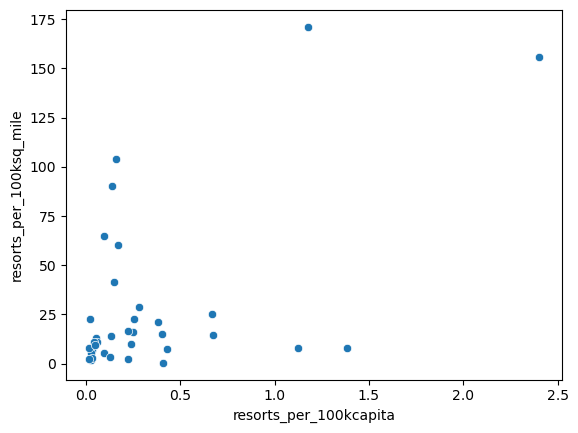

In [41]:

sns.scatterplot(x='resorts_per_100kcapita', y ='resorts_per_100ksq_mile', data=state_summary)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='resorts_per_100kcapita', ylabel='Count'>

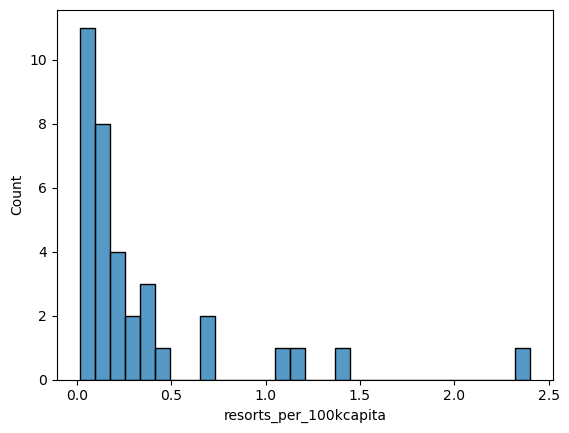

In [45]:
sns.histplot(state_summary.resorts_per_100kcapita, bins=30)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


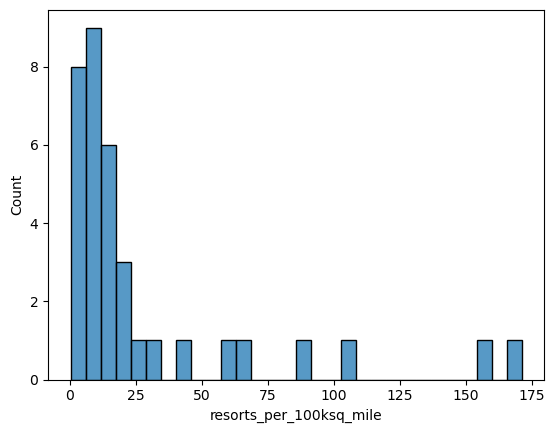

In [127]:
sns.histplot(state_summary.resorts_per_100ksq_mile, bins = 30 )
plt.show();

In [47]:
# Top states by resort density
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [50]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

In [58]:
state_summary_scale = state_summary.set_index('state')
state_summary_index = state_summary_scale.index
state_summary_columns = state_summary_scale.columns
print(f"index: {state_summary_index}")
print(f"columns:{state_summary_columns}")
state_summary_scale.head()


index: Index(['Alaska', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Missouri', 'Montana', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Tennessee', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')
columns:Index(['resorts_per_state', 'state_total_skiable_area_ac',
       'state_total_days_open', 'state_total_terrain_parks',
       'state_total_nightskiing_ac', 'resorts_per_100kcapita',
       'resorts_per_100ksq_mile'],
      dtype='object')


,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [59]:
# SCALE
state_summary_scale = scale(state_summary_scale)

In [63]:
state_summary_scale[0]

array([-0.80691244, -0.39201176, -0.6890595 , -0.81611762,  0.06941027,
        0.1395934 , -0.6899993 ])

In [64]:
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns = state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [65]:
# Verifying the scaling 
state_summary_scaled_df.mean()


resorts_per_state             -7.295751e-17
state_total_skiable_area_ac   -4.163336e-17
state_total_days_open          7.692260e-17
state_total_terrain_parks      4.599495e-17
state_total_nightskiing_ac     7.612958e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

In [66]:
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

In [67]:

state_summary_scale.shape

(35, 7)

In [74]:
state_pca = PCA().fit(state_summary_scale)

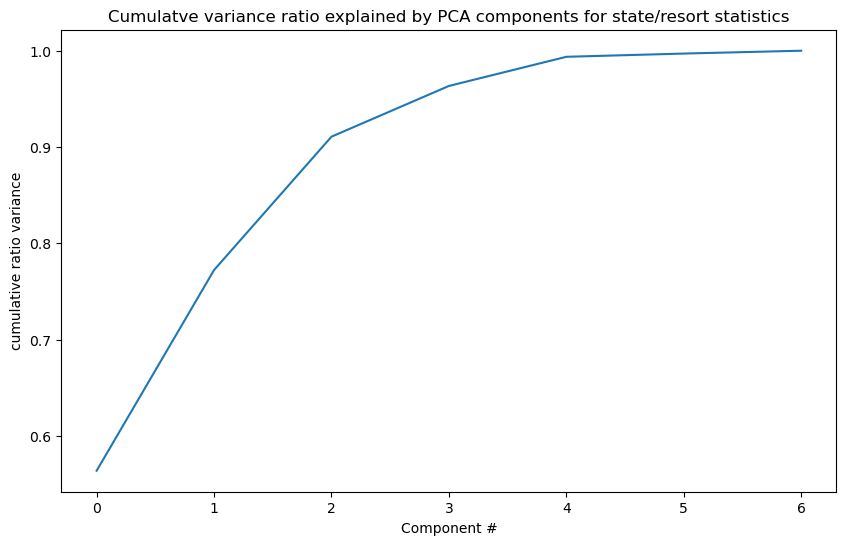

In [78]:

plt.subplots(figsize=(10,6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('cumulative ratio variance')
plt.title('Cumulatve variance ratio explained by PCA components for state/resort statistics')
plt.show();

In [79]:
state_pca_x = state_pca.transform(state_summary_scale)


In [80]:
state_pca_x.shape

(35, 7)

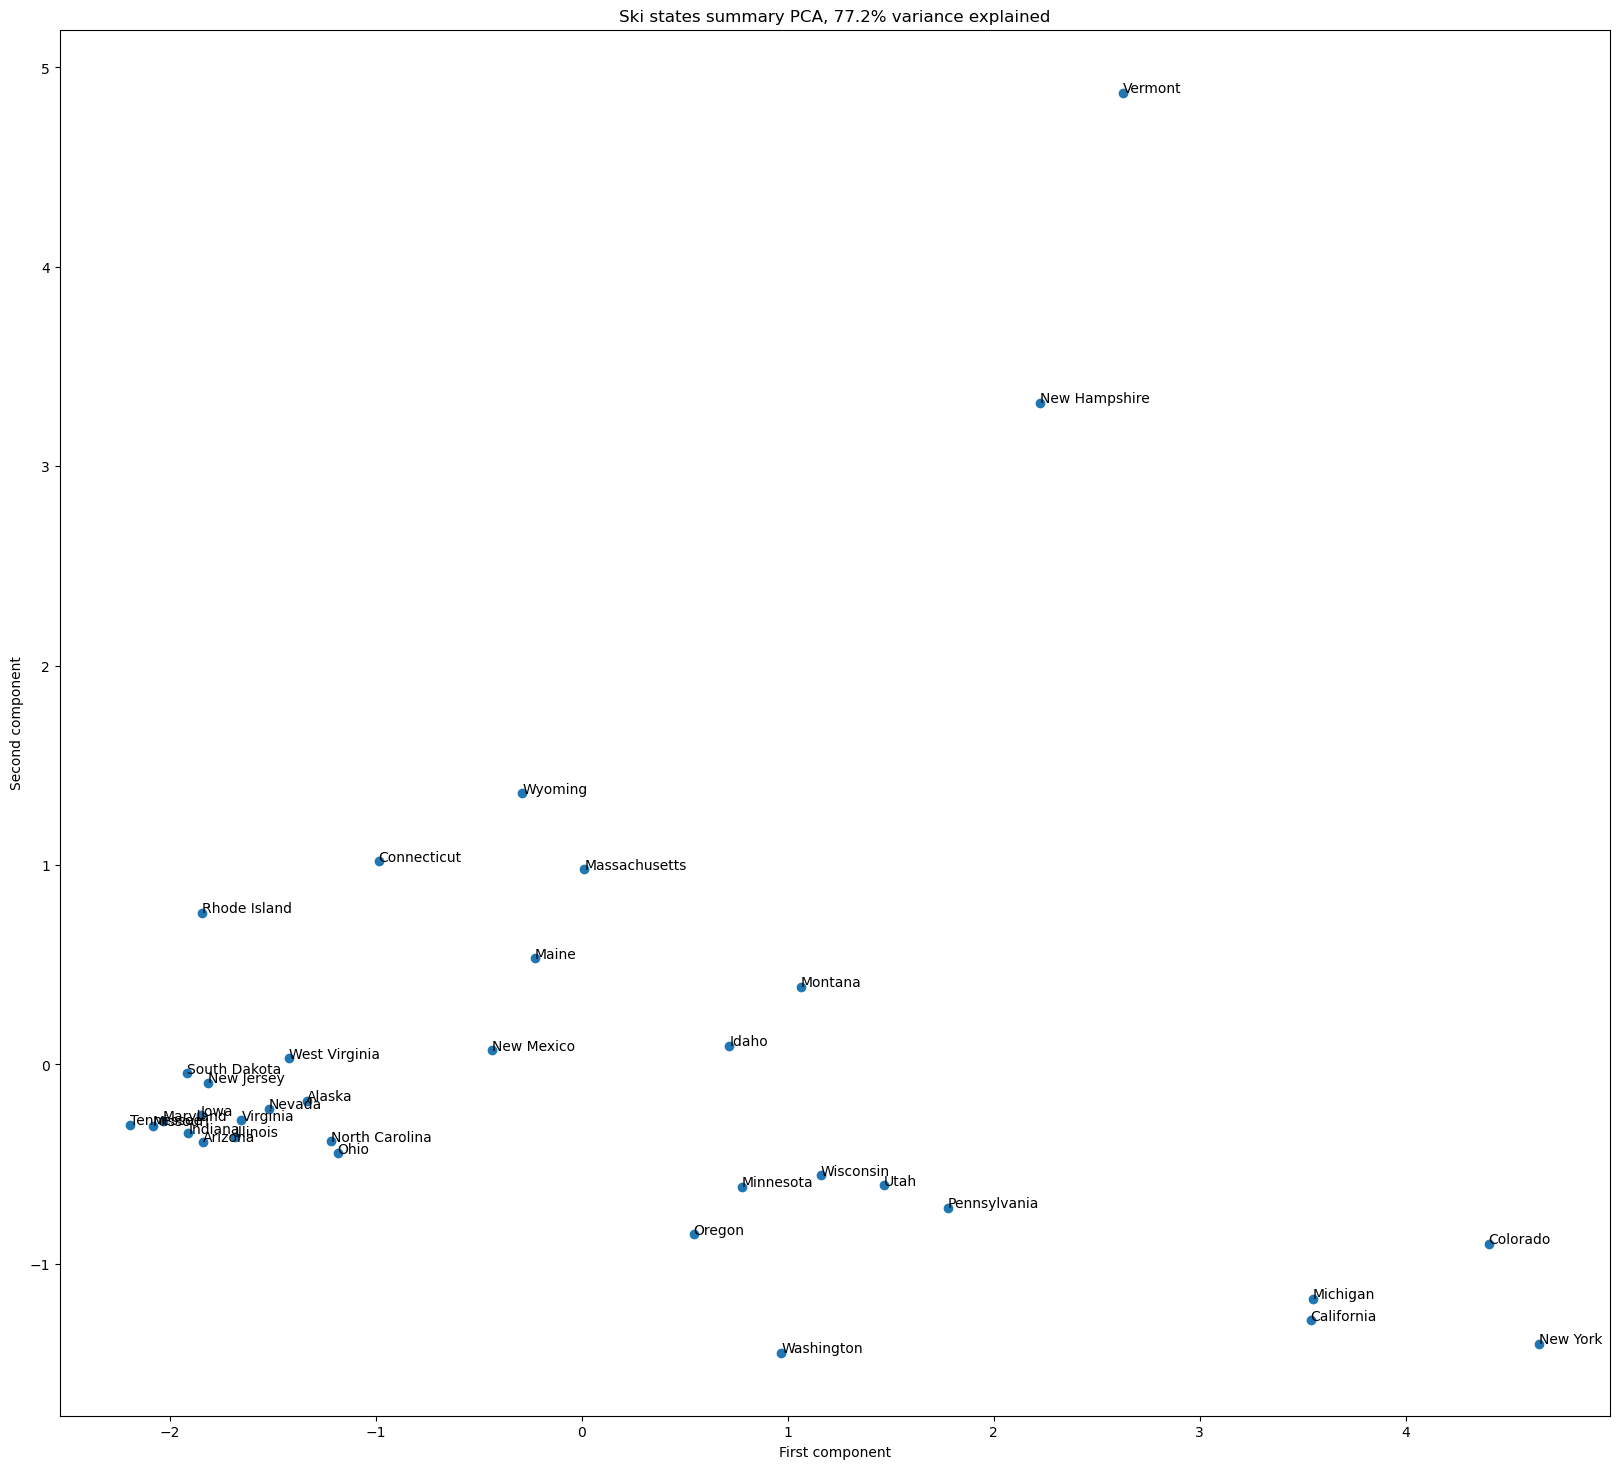

In [96]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var =100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(20,18))
plt.scatter(x=x, y=y)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title(f"Ski states summary PCA, {pc_var:.1f}% variance explained")
for s, x, y in zip(state,x,y):
    plt.annotate(s, (x,y))

In [98]:

state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

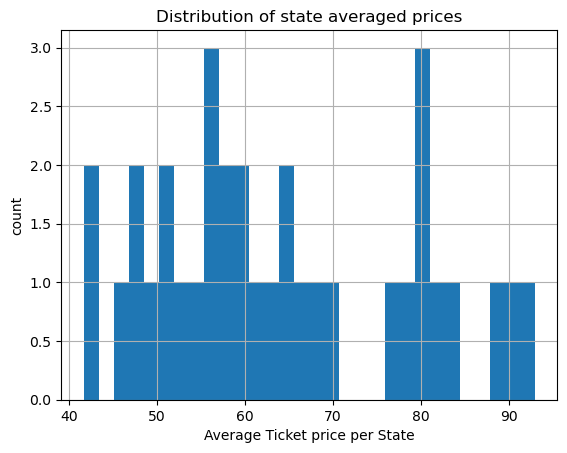

In [100]:
state_avg_price.hist(bins=30)
plt.xlabel('Average Ticket price per State')
plt.ylabel('count')
plt.title("Distribution of state averaged prices");

In [101]:

# Adding average ticket price to scatter plot

pca_df = pd.DataFrame({'PC1':state_pca_x[:,0], 'PC2':state_pca_x[:,1]}, index=state)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.336533,-0.182208
Arizona,-1.839049,-0.387959
California,3.537857,-1.282509
Colorado,4.402210,-0.898855
Connecticut,-0.988027,1.020218


In [102]:
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [104]:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [105]:
pca_df= pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.336533,-0.182208,57.333333
Arizona,-1.839049,-0.387959,83.500000
California,3.537857,-1.282509,81.416667
Colorado,4.402210,-0.898855,90.714286
Connecticut,-0.988027,1.020218,56.800000


In [109]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1, labels=['Q1', 'Q2', 'Q3', 'Q4'])
pca_df.Quartile.value_counts()

Quartile
Q1    9
Q4    9
Q2    8
Q3    8
Name: count, dtype: int64

In [110]:
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [121]:
pca_df[pca_df.isnull().any(axis=1)]
pca_df[pd.isna(pca_df['AdultWeekend'])]


,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.843646,0.761339,NaN,NaN


In [128]:
# Because Quartile is a category typ, there's an extra step here. Add the category (the string 'NA') that you're going to
#use as a replacement

pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
#pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df.Quartile.fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1             -1.843646
PC2              0.761339
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

In [129]:
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.336533,-0.182208,57.333333,Q2
Arizona,-1.839049,-0.387959,83.500000,Q4
California,3.537857,-1.282509,81.416667,Q4
Colorado,4.402210,-0.898855,90.714286,Q4
Connecticut,-0.988027,1.020218,56.800000,Q2


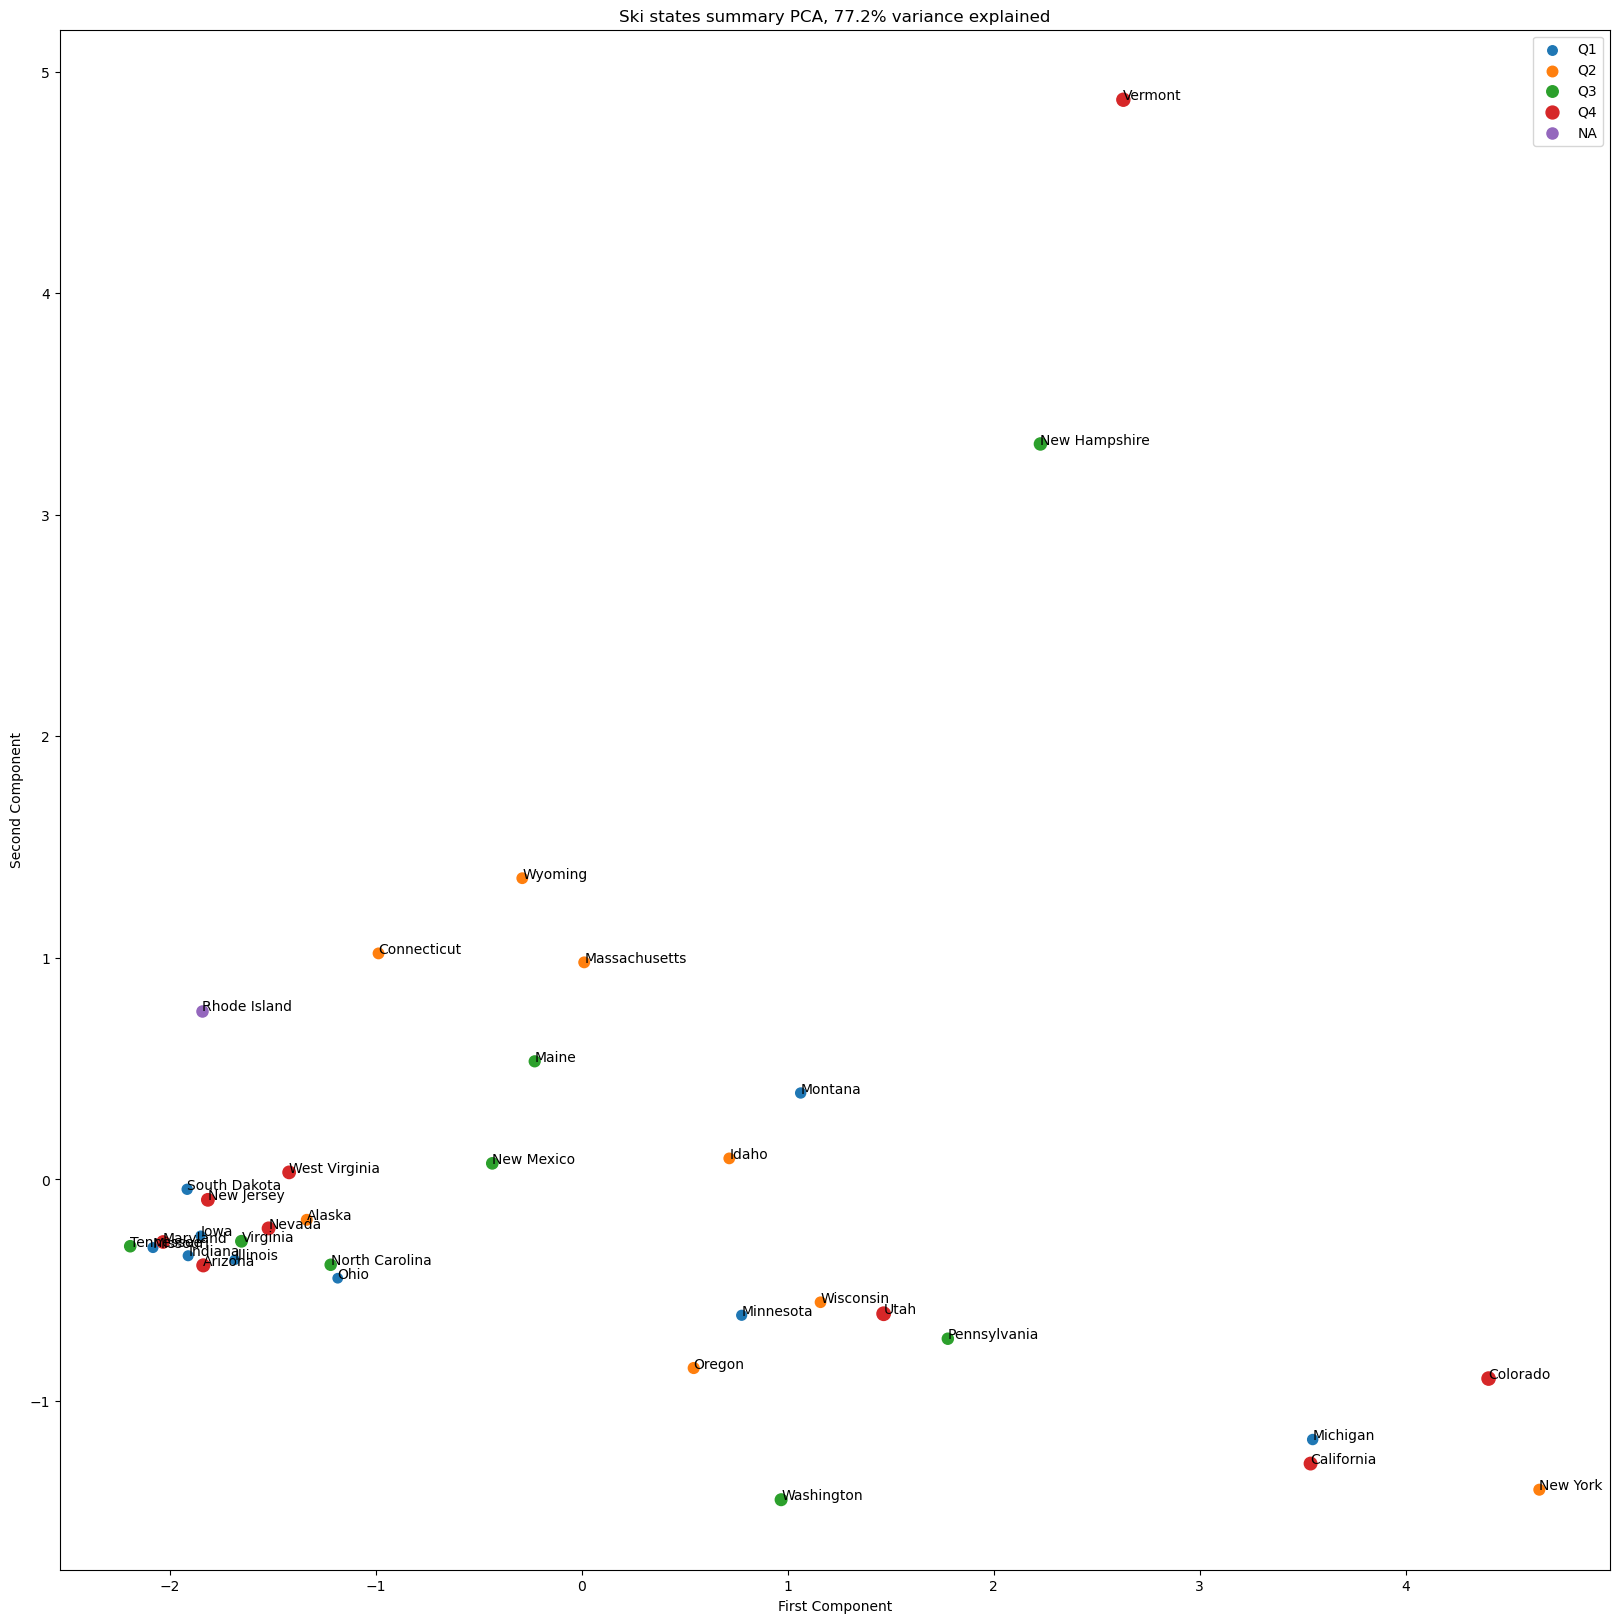

In [140]:


x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100* state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(20,20))
    
for q in quertiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label = q)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s,x,y in zip(state, x,y):
    plt.annotate(s, (x,y))


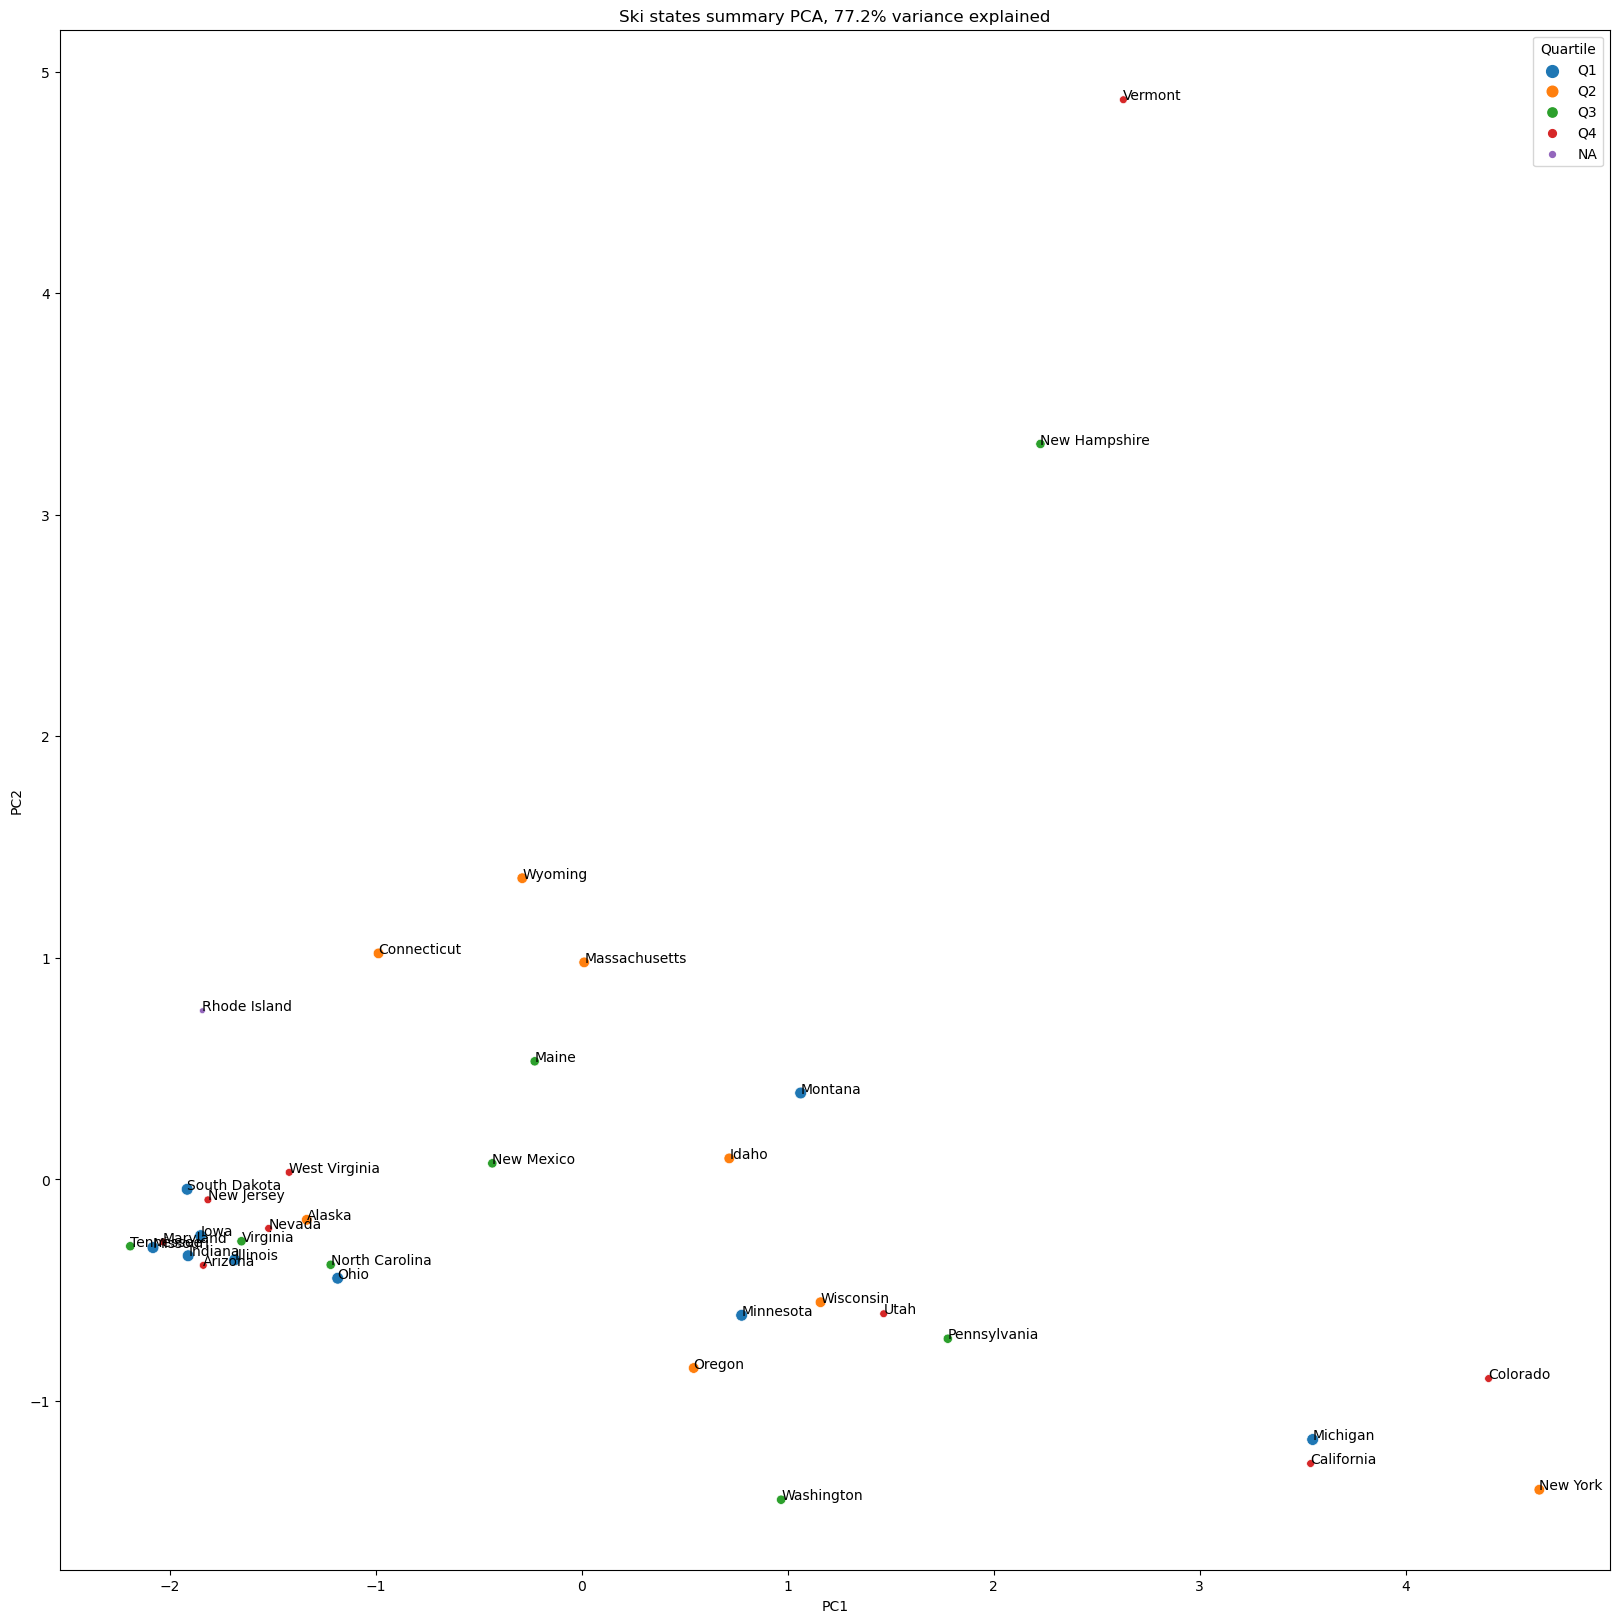

In [151]:


x = pca_df.PC1
y = pca_df.PC2

state = pca_df.index
plt.subplots(figsize=(20,20))

sns.scatterplot(x=x, y=y, size=pca_df.Quartile ,hue=pca_df.Quartile, hue_order = pca_df.Quartile.cat.categories,data=pca_df)

for s, x,y in zip(state,x,y):
    plt.annotate(s, (x,y))
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In [153]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486079,0.318224,0.489997,0.488420,0.334398,0.187154,0.192250
1,-0.085092,-0.142204,-0.045071,-0.041939,-0.351064,0.662458,0.637691
2,-0.177937,0.714835,0.115200,0.005509,-0.511255,0.220359,-0.366207
3,0.056163,-0.118347,-0.162625,-0.177072,0.438912,0.685417,-0.512443
4,-0.209186,0.573462,-0.250521,-0.388608,0.499801,-0.065077,0.399461
5,-0.818390,-0.092319,0.238198,0.448118,0.246196,0.058911,-0.009146
6,-0.090273,-0.127021,0.773728,-0.613576,0.022185,-0.007887,-0.005631


In [156]:
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


In [159]:
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [160]:
state_summary[state_summary.state.isin(['New Hampshire','Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [162]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

In [163]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2280.0,345.0,4.0,580.0,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,2280.0,345.0,4.0,580.0,0.410091,0.450867,0.280702,0.130435,0.250000,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,2280.0,345.0,4.0,580.0,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,1577.0,237.0,6.0,80.0,0.027477,1.754540,0.492708,0.514768,0.666667,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,1577.0,237.0,6.0,80.0,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000
